<a href="https://colab.research.google.com/github/CogitoNTNU/course-on-large-language-models/blob/main/Course_on_Large_Language_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course on Large Language Models


**NOTE:** You're only meant to change code marked with "# TODO:"

## Table of Contents

1. **Setting Up**
    - API Key Configuration
    - Connecting to OpenAI API
2. **Exploring the API**
    - Creating Chat Completions
    - Understanding Completion Parameters
3. **Prompt Engineering**
    - Crafting Effective Prompts
    - Strategies and Best Practices
4. **Advanced Techniques**
    - Utilizing Embeddings
    - Function Calling in LLMs
5. **Extras**
    - Creating an API key
    - Local Development with LLMs
    - Context Windows
    - Fine-Tuning LLMs

## Part 0: Setup
To be able to use OpenAI one needs to configure an API key to the be allowed responses to requests. Remember not to commit this key to any repository or upload it as OpenAI will disable the key if it is found, and others can use it to make requests that you or your organisation (Cogito) will pay for.

In [1]:
%pip install openai
%pip install langchain
%pip install numpy
%pip install python-dotenv

     ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
     ---------------------------------------- 68.0/68.0 kB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/786.3 kB ? eta -:--:--
   --------------------------------- ----- 665.6/786.3 kB 13.9 MB/s eta 0:00:01
   --------------------------------------- 786.3/786.3 kB 12.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/107.2 kB ? eta -:--:--
   ---------------------------------------- 107.2/107.2 kB 6.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/73.5 kB ? eta -:--:--
   ---------------------------------------- 73.5/73.5 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/78.8 kB ? eta -:--:--
   ---------------------------------------- 78.8/78.8 kB 4.3 MB/s eta 0:00:00
   ---------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\simen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/43.2 kB ? eta -:--:--
     ---------------------------------------- 43.2/43.2 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------- ----------------- 0.6/1.0 MB 18.5 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 12.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/443.5 kB ? eta -:--:--
   --------------------------------------  440.3/443.5 kB 26.9 MB/s eta 0:00:01
   --------------------------------------  440.3/443.5 kB 26.9 MB/s eta 0:00:01
   --------------------------------------  440.3/443.5 kB 26.9 MB/s eta 0:00:01
   ---------------------------------------- 443.5/443.5 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/372.7 kB ? eta -:--:--
   --------------------------------------- 372.7/372.7 kB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/162.0 kB ? eta -:--:--
   ---------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\simen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.9 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.9 kB 165.2 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.9 kB 281.8 kB/s eta 0:00:01
     -------------------------------------- 60.9/60.9 kB 325.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
    --------------------------------------- 0.3/13.1 MB 5.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/13.1 MB 7.4 MB/s eta 0:00:02
   --- ------------------------------------ 1.2/13.1 MB 9.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.7/13.1 MB 9.9 MB/s eta 0:00:02
   ------- -------------------------------- 2.3/13.1 MB 11.5 MB/s eta 0:00:01
   --------- ------------------------------ 3.1/13.1 MB 13.1 MB/s eta 0:00:01
   ----------- ---------------------------- 3.9/13.1 MB 13.8 MB/s eta 0:00:01
   


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\simen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\simen\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

# Once you add your API key below, make sure to not share it with anyone! The API key should remain private.
OPENAI_API_KEY: str = os.getenv("OPENAI_API_KEY")

# There are many different models to try out "gpt-4", "gpt-4-turbo-preview", "gpt-3.5-turbo"
MODEL_NAME: str = "gpt-4o"

if not OPENAI_API_KEY:
  print("[ERROR] The key is not configured correctly")
else:
  print("[SUCCESS] API Key is configured correctly.")

[SUCCESS] API Key is configured correctly.


In [2]:
from openai import OpenAI

client = OpenAI(
  api_key=OPENAI_API_KEY,
)

## Part 1: API Connections (10 min)

In [3]:
completion = client.chat.completions.create(
  model=MODEL_NAME,
  messages=[
    {"role": "system", "content": "You are a poetic assistant, skilled in explaining complex AI concepts with creative flair."},
    {"role": "user", "content": "Create a limerick about Large Language Models"}
  ]
)
print("The Answer for the language model ")
print(completion)
print("\nThe answer of the model: ")
print(completion.choices[0].message.content)

The Answer for the language model 
ChatCompletion(id='chatcmpl-CZDnDsnT7akHZZcwWUyV2sFHDSNP6', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='In the realm of the digital sea,  \nLarge Language Models roam free.  \nWith words they entwine,  \nThought and design,  \nCrafting tales from just you and me.', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1762510535, model='gpt-4o-2024-08-06', object='chat.completion', service_tier='default', system_fingerprint='fp_cbf1785567', usage=CompletionUsage(completion_tokens=37, prompt_tokens=36, total_tokens=73, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))

The answer of the model: 
In the realm of the digital sea,  
Large Language Models roam free.  
With word

## Part 2: Understanding Completion Parameters (15 min)


### Key Parameters:
* **Model Name:** Specifies the particular model version you want to use (e.g., text-davinci-003). Different models have varying capabilities, sizes, and costs.

* **Messages:** The list of input text that you provide to the model. This is where the art of prompt engineering comes into play, guiding the model to generate the desired output.

* **Temperature:** Controls the randomness of the output. A higher temperature leads to more varied responses, while a lower temperature results in more deterministic outputs. It's typically set between 0 and 2.

* **Max Tokens:** Determines the maximum length of the model's response, measured in tokens (words or pieces of words). This helps control output verbosity.

* **Top P:** Influences sample diversity by only considering the top P percent of probability mass when generating responses. Adjusting this can affect the creativity and relevance of the output.

* **Frequency Penalty:** Discourages repetition by penalizing words based on their frequency in the text so far. This can help generate more diverse and interesting responses.

* **Presence Penalty:** Similar to frequency penalty but penalizes based on the presence of words, encouraging the model to introduce new concepts and terms.



### **Task 2.1** Experimenting with Parameters
Now that you're familiar with the parameters that can influence the behavior of LLMs, let's put this knowledge to the test. Your task is to experiment with these parameters to see firsthand how they affect the model's outputs.

**Choose a Prompt:** *Start with a simple prompt, such as asking the model to write a short story about a space adventure.*




In [4]:
# TODO: Fill in your own prompt
prompt: str = "Write a paragraph about a fantasy adventure"

### **Task 2.2**
*Vary the Temperature: Generate three completions using temperatures of 0.0, 1.0, and 2.0. Observe how the creativity and variability of the responses change.*

In [5]:
# TODO: Change the temperature
TEMPERATURE: float = 0.0

completion = client.chat.completions.create(
  model=MODEL_NAME,
  temperature=TEMPERATURE,
  messages=[
    {"role": "user", "content": prompt}
  ]
)
output = completion.choices[0].message.content
print(f"The Model responded with: '{output}'")

The Model responded with: 'In the heart of the mystical realm of Eldoria, where the skies shimmered with hues of lavender and gold, a band of unlikely heroes embarked on a quest that would alter the fate of their world. Led by Elara, a fierce and wise elven sorceress, the group included Thorne, a brooding warrior with a mysterious past, and Lira, a nimble thief with a heart of gold. Their journey began in the ancient city of Luminastra, where they discovered a hidden map leading to the fabled Crystal of Aetheria, a powerful artifact said to hold the essence of magic itself. As they traversed through enchanted forests, scaled treacherous mountains, and navigated the labyrinthine caves of the Shadowlands, they faced formidable foes and forged unbreakable bonds. With each step, the air crackled with anticipation, for they knew that the destiny of Eldoria rested upon their shoulders, and the balance between light and darkness hung by a thread.'



### **Task 2.3**
*Adjust Max Tokens: Try generating responses with different limits on length, such as 50, 100, and 2000 tokens, to see how it impacts the detail and depth of the story.*


In [6]:
# TODO: Change the MAX_TOKENS
MAX_TOKENS: int = 200

completion = client.chat.completions.create(
  model=MODEL_NAME,
  max_tokens=MAX_TOKENS,
  messages=[
    {"role": "user", "content": prompt}
  ]
)
output = completion.choices[0].message.content
print(f"The Model responded with: '{output}'")

The Model responded with: 'In the heart of the ancient, mist-covered Forest of Eldergrove, a band of unlikely companions set forth on an epic quest to recover the lost Amulet of Lyria, a mystical artifact said to bestow unimaginable power upon its bearer. Led by Elara, the fierce and enigmatic elf with sapphire eyes and arrows that never missed their mark, the group ventured into territories few dared to traverse. Among them was Brom, a hulking warrior whose strength was rivaled only by his steadfast loyalty; Lyra, a cunning rogue with a silver tongue and a past shrouded in mystery; and Thrain, a wise and gentle dwarf whose knowledge of the arcane was as vast as the caverns beneath his mountain home. Their journey took them through treacherous landscapes, from the icy peaks of the Frostvale Mountains to the fiery depths of the Fireforged Caverns, facing challenges and creatures that tested their courage and camaraderie. As they uncovered clues to the Amulet's whereabouts,'



### **Task 2.4**
*Experiment with Top P, Frequency Penalty, and Presence Penalty: Adjust these parameters to explore their effects on repetition, novelty, and thematic diversity.*


In [7]:
# TODO: Change the different parameters and check effect on output
# TOP_P can be any float number between 0 and 1
TOP_P: float = 0
# FREQUENCY_PENALTY can be any float Number between -2.0 and 2.0.
FREQUENCY_PENALTY: float = 2.0
# PRESENCE_PENALTY  can be any float Number between -2.0 and 2.0.
PRESENCE_PENALTY: float = 2.0

completion = client.chat.completions.create(
  model=MODEL_NAME,
  top_p=TOP_P,
  frequency_penalty=FREQUENCY_PENALTY,
  presence_penalty=PRESENCE_PENALTY,

  messages=[
    {"role": "user", "content": prompt}
  ]
)
output = completion.choices[0].message.content
print(f"The Model responded with: '{output}'")

The Model responded with: 'In the heart of Eldoria, a realm where magic weaves through every breath and shadow, young Elara embarked on an epic quest that would test her courage beyond measure. Armed with only an ancient map whispered to hold secrets of forgotten realms, she ventured into the Enchanted Forest—a place teeming with mystical creatures and hidden dangers. Her journey was guided by whispers from ethereal spirits who spoke in riddles about a lost artifact capable of restoring balance to their world. Alongside companions as diverse as they were loyal—an enigmatic elven archer named Thalion and Brumbletusk, a jovial dwarf warrior whose laughter could shake mountains—they faced trials crafted by time itself: rivers flowing backward under moonlit skies and labyrinthine caves echoing tales long past. As destiny intertwined their fates beneath starlit canopies painted across twilight horizons, Elara discovered not just the power within herself but also forged bonds unbreakable eve


Reflect on how each parameter influenced the model's output. This exercise will enhance your understanding of how to control and guide the AI to achieve results that best fit your objectives.

## Part 3: Prompt engineering (15 min)


Prompt engineering is an art and science of designing inputs that guide Large Language Models (LLMs), such as Generative Pre-trained Transformer (GPT), to produce specific, high-quality responses or outputs. This process is foundational in the field of artificial intelligence because the precision with which we articulate our prompts significantly affects the AI's performance. A well-crafted prompt can lead to outputs that are not only accurate but also creative and contextually relevant, showcasing the model's capabilities to their fullest extent.

### Engaging with Prompt Engineering
Before we dive into specific tactics for effective prompt engineering, it's important to understand that the goal is to communicate with the model in its language. This means being clear, direct, and detailed in your requests.

#### Tactics:
<ul> 
    <li> <b>Include details in your query</b> to get more relevant answers.  
        <details>
            <summary>Example</summary>
            Often people ask questions that are too broad or vague. Remember, the AI can't read your mind ;) 
            <br>
            Your goal is to extract specific information from the AI.
            <p> <i>Bad:</i> "Tell me about dogs."</p>
            <p> <i>Good:</i> "Provide a detailed comparison between the adaptability, exercise needs, and temperament of Labrador Retrievers and Border Collies for potential dog owners."</p>
        </details>
    </li>
    <li> <b>Ask the model to adopt a persona</b> for more tailored responses. 
        <details>
            <summary>Example</summary>
            Your goal is to make the interaction more engaging or specific.
            <p> <i>Bad:</i> "Explain quantum physics."</p>
            <p> <i>Good:</i> "Pretend you're a renowned physicist explaining the concepts of quantum physics to a high school student in a way that's easy to understand."</p>
        </details>
    </li>
    <li> <b>Use delimiters</b> to clearly indicate distinct parts of the input.
        <details>
            <summary>Example</summary>
            Your goal is to organize a multi-part question.
            <p> <i>Bad:</i> "What is the capital of France and tell me about its history."</p>
            <p> <i>Good:</i> "Question 1: What is the capital of France? | Question 2: Provide a brief history of the capital."</p>
        </details>
    </li>
    <li> <b>Specify the steps</b> required to complete a task.
        <details>
            <summary>Example</summary>
            Your goal is to get a walkthrough.
            <p> <i>Bad:</i> "How to bake a cake."</p>
            <p> <i>Good:</i> "List all the steps necessary to bake a chocolate cake, then create a list of needed ingredients with quantities, and baking time. Before estimating total time needed."</p>
        </details>
    </li>
    <li> <b>Provide examples</b> to illustrate the type of response you're seeking. 
        <details>
            <summary>Example</summary>
            Your goal is to clarify your expectations.
            <p> <i>Bad:</i> "Generate a catchy slogan for my product."</p>
            <p> <i>Good:</i> "Generate a catchy slogan for my eco-friendly water bottle product. For example, something like 'Hydrate Sustainably' or 'Drink Green, Live Clean'."</p>
        </details>
    </li>
    <li> <b>Specify the desired length</b> of the output to control verbosity. 
        <details>
            <summary>Example</summary>
            Your goal is to manage the depth of the response.
            <p> <i>Bad:</i> "Write an article on climate change."</p>
            <p> <i>Good:</i> "Write a concise 300-word article on the impacts of climate change on global weather patterns."</p>
        </details>
    </li>
</ul>


### Applying What We've Learned
Now that we've outlined the key tactics for effective prompt engineering, let's put this knowledge into practice.

### **Task 3.1**


Imagine you're working on the Cogito Project **TutorAI**, a cutting-edge AI tool designed to support students in their study efforts by creating concise, informative flashcards from dense academic texts. Your challenge is to engineer a prompt that instructs the LLM to distill complex material into easy-to-review flashcards, focusing on key concepts, definitions, and examples relevant to an upcoming exam.

* **Extract Key Concepts and Definitions:** The AI must identify and summarize the main ideas and definitions found in a given academic text. This involves discerning the most important points that are crucial for understanding the subject matter.

* **Format the Information for Flashcards:** The output should be structured in a way that is suitable for flashcard creation. Each flashcard will have a term or concept on one side and its definition or explanation on the other side, along with an example if appropriate.

* **Control the Length:** Each flashcard content (term/definition/example) should be concise, aiming for no more than 50 words per side to facilitate quick review and memorization.

This task will test your ability to use detailed queries, specify a structure, and control the output length—all crucial aspects of prompt engineering. Remember, the effectiveness of your prompt will directly influence the quality and relevance of the AI's response. Good luck!

In [8]:
book_paragraphs: str = """
Chapter 1 - Epic Introduction
Since the dawn of time, humans have tried to define how we think, and this struggle has led us to create artificial intelligence. Historically, four approaches to artificial intelligence have been followed, each described below.

Acting Humanly
If we can't distinguish between a computer and a human, the computer is said to act humanly. The computer's capability to act humanly can be tested by performing a turing test. A computer passes the turing test if a human interrogator cannot tell whether he is communicating with a computer or a person. To pass a turing test, the computer would need to possess the following capabilities:

Natural language processing to enable it to communicate successfully.
Knowledge representation to store what it knows or hears.
Automated reasoning to use the stored information to draw conclusions.
Machine learning to adapt to new circumstances and to detect patterns.

Thinking humanly
To make a computer think like a human, we must know how humans think. The computers ability to think humanly can be determined by comparing the computer's input-output mechanism by the corresponding human behaviour.

Acting Rationally
An agent is something that acts. A rational agent is an agent that does the right thing based on what it knows, its functions, and the surrounding environment; it acts so that it achieves the best expected outcome.

Thinking rationally
Using sound logic rules to reach the right conclusion.

A relevant quote, demonstrating the logical rule of modus ponens: "Socrates is a man; all men are mortal; therefore, Socrates is mortal.
"""

def generate_flashcards_from_paragraphs(paragraphs: str) -> str:
  completion = client.chat.completions.create(
    model=MODEL_NAME,
    messages=[
      # TODO: Create a prompt or combination of "system" and "user" prompts to achieve tasks objectives
      {"role": "system", "content":  "You are TutorAI, an assistant that creates concise, informative flashcards from academic texts. Your goal is to identify key terms, definitions, and examples; then present them in a clear flashcard format. Keep each definition under 50 words."},
      {"role": "user", "content": paragraphs},
    ]
  )
  return completion.choices[0].message.content

flashcards = generate_flashcards_from_paragraphs(book_paragraphs)
print(f"The Model responded with the following flashcards: \n'{flashcards}'")

The Model responded with the following flashcards: 
'**Flashcard 1:**  
Q: What is the Turing Test?  
A: A test to determine if a computer can act humanly, meaning a human interrogator cannot tell if they are communicating with a computer or a human.

**Flashcard 2:**  
Q: What capabilities does a computer need to pass the Turing Test?  
A: Natural language processing, knowledge representation, automated reasoning, and machine learning.

**Flashcard 3:**  
Q: Define "Acting Humanly" in AI.  
A: When a computer behaves indistinguishably from a human, typically measured by the Turing Test.

**Flashcard 4:**  
Q: Define "Thinking Humanly" in AI.  
A: Creating a computer that mimics human thinking processes, verified by comparing its input-output with human behavior.

**Flashcard 5:**  
Q: Define "Acting Rationally" in AI.  
A: An agent acts to achieve the best expected outcome, considering its knowledge and environment.

**Flashcard 6:**  
Q: Define "Thinking Rationally" in AI.  
A: Using

## Part 4: Embeddings (15 min)

In [9]:
def create_embedding(prompt: str, model="text-embedding-ada-002") -> list[float]:
    return client.embeddings.create(model=model, input=prompt).data[0].embedding

print(create_embedding("This is an embedding!"))

database: list[list[list[float]], str] = []

# Create embedding-text key-value pairs and add them to the database
corresponding_text_1 = "This is an embedding!"
embedding_1 = create_embedding(corresponding_text_1)
database.append([embedding_1, corresponding_text_1])

corresponding_text_2 = "Sverre is CTO of Cogito NTNU"
embedding_2 = create_embedding(corresponding_text_2)
database.append([embedding_2, corresponding_text_2])

[-0.023320836946368217, 0.0036924658343195915, 0.0025099546182900667, 0.0012706232955679297, -0.010718362405896187, 0.007365168537944555, 0.00589938135817647, -0.014400946907699108, -0.008801310323178768, -0.036733612418174744, 0.01187122892588377, 0.03631199151277542, -0.013089972548186779, -0.0034981255885213614, 0.004015268292278051, 0.017484040930867195, 0.02378198318183422, 0.003939508926123381, 0.0070950682274997234, -0.020580310374498367, -0.01803741604089737, 0.01043508667498827, 0.005425059236586094, -0.012898926623165607, -0.007193885277956724, 0.006495577748864889, 0.014572229236364365, -0.018485387787222862, -0.0017704732017591596, -0.01963166519999504, 0.0022612647153437138, -0.0069040218368172646, -0.011647243052721024, -0.029671482741832733, -0.00385057320818305, -0.00227608741261065, -0.0015736623900011182, -0.02946067415177822, 0.01401885412633419, 0.003071565181016922, 0.013215141370892525, -0.007622092962265015, -0.0031769699417054653, -0.012958216480910778, -0.01590

In [10]:
import numpy as np

def cosine_similarity(a: list[float], b: list[float]) -> float:
    """ 
    Takes 2 vectors a, b and finds how similar they are using the cosine similarity 

    Args:
    a (list[float]): A list of floats
    b (list[float]): A list of floats

    Returns:
        The similarity of the two vectors a and b described as a float between 0 and 1
    
    """
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def search_database(query: str, database: list[list[list[float]], str], top_k: int=1):
    """
    Searches the database for the most similar documents to the query

    Args:
        query (str): The query to search for
        database (list[list[list[float]], str]): The database to search in
        top_k (int): The number of documents to return
    Returns:
        A list of the top_k most similar documents to the query
    """
    query_embedding = create_embedding(query)
    results = []
    for (doc_embedding, doc) in database:
        similarity = cosine_similarity(query_embedding, doc_embedding)
        results.append((similarity, doc))
    return sorted(results, reverse=True)[:top_k]

search_database("Who is the CTO of Cogito?", database)

[(np.float64(0.8882484053164321), 'Sverre is CTO of Cogito NTNU')]

### **Task 4.1**
*Create a new embedding with some text of your choice, and add it to the database. See if you can make the model find it.*

<details>
    <summary><strong>Hint:</strong></summary>
      - Look at the previous two cells
</details>

In [12]:
# TODO: Create an embedding for some text and append it to the database
corresponding_text_3 = "The capital of Norway is Oslo."
embedding_3 = create_embedding(corresponding_text_3)
database.append([embedding_3, corresponding_text_3])

while True:
  user_input: str = input("What would you like to ask the model: ")

  if user_input == "q":
      print("[SUCCESS] Shut down")
      break
  print(user_input)
  answer = search_database(user_input, database, top_k=1)

  print(f"The AI gave the answer: {answer}\n")

What is the capital of Norway?
The AI gave the answer: [(np.float64(0.9420935992834718), 'The capital of Norway is Oslo.')]

[SUCCESS] Shut down


## Part 5: Function Calling (35 min)

Example of Yr application using Langchain

C:\Users\simen\AppData\Local\Temp\ipykernel_21236\984294257.py:70: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(memory_key="chat_history")
C:\Users\simen\AppData\Local\Temp\ipykernel_21236\984294257.py:73: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent_chain = initialize_agent(




> Entering new AgentExecutor chain...
Thought: I can use the "Weather at location" tool to get the weather at the specified latitude and longitude. Then, I can calculate the average temperature from the weather data.

Action:
```
{
  "action": "Weather at location",
  "action_input": {
    "latitude": 63.41710242319078,
    "longitude": -10.4066603487495
  }
}
```


C:\Users\simen\AppData\Local\Temp\ipykernel_21236\984294257.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


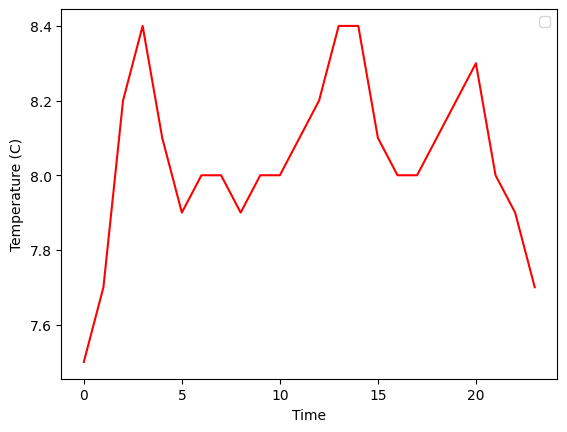


Observation: {"type":"Feature","geometry":{"type":"Point","coordinates":[-10.4067,63.4171,0]},"properties":{"meta":{"updated_at":"2025-11-07T09:17:15Z","units":{"air_pressure_at_sea_level":"hPa","air_temperature":"celsius","cloud_area_fraction":"%","precipitation_amount":"mm","relative_humidity":"%","wind_from_direction":"degrees","wind_speed":"m/s"}},"timeseries":[{"time":"2025-11-07T10:00:00Z","data":{"instant":{"details":{"air_pressure_at_sea_level":1002.6,"air_temperature":7.5,"cloud_area_fraction":100.0,"relative_humidity":89.7,"wind_from_direction":69.9,"wind_speed":13.0}},"next_12_hours":{"summary":{"symbol_code":"cloudy"},"details":{}},"next_1_hours":{"summary":{"symbol_code":"cloudy"},"details":{"precipitation_amount":0.0}},"next_6_hours":{"summary":{"symbol_code":"cloudy"},"details":{"precipitation_amount":0.1}}}},{"time":"2025-11-07T11:00:00Z","data":{"instant":{"details":{"air_pressure_at_sea_level":1002.8,"air_temperature":7.5,"cloud_area_fraction":100.0,"relative_humidit

'{\n  "action": "Final Answer",\n  "action_input": "The average temperature at the specified location is 7.675 degrees Celsius."\n}'

In [13]:
from langchain_openai import ChatOpenAI
from langchain.tools import StructuredTool
from langchain.agents import AgentType
from langchain.memory import ConversationBufferMemory
from langchain.agents import initialize_agent
import json
import matplotlib.pyplot as plt
import requests

# Give the agent a list of tools to use
def get_weather(latitude: float, longitude: float) -> str:
    """
    Narrate the story based on the given prompt.
    """

    url = f"https://api.met.no/weatherapi/locationforecast/2.0/compact?lat={latitude}&lon={longitude}"
    headers = {
        'User-Agent': 'Mozilla/5.0 (compatible; LangChain/1.0; +https://langchain.ai/)'
    }
    response = requests.get(url, headers=headers)

    plot_weather_data(response.text)

    # Cap the response at 2000 characters
    response = response.text[:2000]

    return response


def plot_weather_data(weather_data):
        # Parse the JSON data
        data = json.loads(weather_data)

        # Extract the temperature data from nested JSON
        temperatures = [data['properties']['timeseries'][i]['data']['instant']['details']['air_temperature'] for i in range(len(data['properties']['timeseries']))]

        # Get the temperature at every round hour
        temperatures = temperatures[::2]

        if len(temperatures) > 24:
            temperatures = temperatures[:24]

        # Plot the data
        plt.plot(temperatures, 'r-')
        plt.xlabel('Time')
        plt.ylabel('Temperature (C)')
        plt.legend()
        plt.show()


def average_temperature(temperatures: list[float]) -> float:
    """Return average temperature from a list of floats."""
    return sum(temperatures) / len(temperatures)


tools: list[StructuredTool] = [
    StructuredTool.from_function(
        name= "Weather at location",
        func=get_weather,
        description="Get the weather at a location given a latitude and longitude.",
    ),
    StructuredTool.from_function(
        name= "Find average temperature",
        func=average_temperature,
        description="Get average temperature from a list of temperatures",
    ),
]

# Make a memory for the agent to use
memory = ConversationBufferMemory(memory_key="chat_history")

llm = ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY)
agent_chain = initialize_agent(
    tools,
    llm,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    memory=memory,
    max_iterations=10,
)

def run_agent(prompt: str) -> str:
    """Run the agent chain."""
    if not isinstance(prompt, str):
        raise TypeError("Prompt must be a string.")

    if (len(prompt) < 1) or (len(prompt) > 1000):
        raise ValueError("Prompt must be at least 1 character or less than 1000 characters.")

    result = agent_chain.invoke({"input": prompt})
    return result["output"]

run_agent("Give me the weather at lat 63.41710242319078, long -10.4066603487495 and get the average temperature")

#### Task 5.1
*Create your own function for dividing two numbers and add it to the AI model tools. 
Try to ask it to do several additions or a combination of dividings and additions.*

In [14]:
from langchain_openai import ChatOpenAI
from langchain.tools import StructuredTool
from langchain.agents import AgentType
from langchain.memory import ConversationBufferMemory
from langchain.agents import initialize_agent


def add(a: int, b: int) -> int:
    """Add two numbers"""
    return a + b

# TODO: Create the divide function:

def divide(a:int, b:int) -> float: 
    """Divide the first number by the second number, if the second number is not zero."""
    if b == 0: 
        raise ValueError()
    return a / b

# TODO: Give the agent the new StructuredTool to use
tools: list[StructuredTool] = [
    StructuredTool.from_function(
        name= "Add two numbers",
        func=add,
        description="Adds two numbers together.",
    ),
    StructuredTool.from_function(
        name = "Divide two numbers", 
        func = divide, 
        description="Divides the first number by the second number, if the second number is not zero."
    ),
]

# Make a memorybuffer for the agent to use
memory = ConversationBufferMemory(memory_key="chat_history")

llm = ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY)
agent_chain = initialize_agent(
    tools,
    llm,
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True, # Change to False if you do not want to see the chain process and only output
    memory=memory,
    max_iterations=3, # Number of times the model has to think about its answer
    )

def run_agent(prompt: str) -> str:
    """Run the agent."""
    if not isinstance(prompt, str):
        raise TypeError("Prompt must be a string.")

    if (len(prompt) < 1) or (len(prompt) > 1000):
        raise ValueError("Prompt must be at least 1 character or less than 1000 characters.")

    result = agent_chain.run(prompt)
    return result


while True:
  user_input: str = input("What would you like to ask the model: ")

  if user_input == "q":
      print("[SUCCESS] Shutting down...")
      break

  answer = run_agent(user_input)
  print(f"The AI gave the answer: {answer}\n")


C:\Users\simen\AppData\Local\Temp\ipykernel_21236\1012527225.py:55: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = agent_chain.run(prompt)




> Entering new AgentExecutor chain...
Thought: I can use the "Divide two numbers" tool to calculate the result of dividing 10 by 2.
Action:
```
{
  "action": "Divide two numbers",
  "action_input": {"a": 10, "b": 2}
}
```
Observation: 5.0
Thought:I can provide the final answer now.
Action:
```
{
  "action": "Final Answer",
  "action_input": "The result of dividing 10 by 2 is 5.0"
}
```

> Finished chain.
The AI gave the answer: The result of dividing 10 by 2 is 5.0

[SUCCESS] Shutting down...


#### Task 5.2
*Work together with others and create something cool, try to utilize the different lesseons you have learned examples are:*
* Create external API access some live data
* Create more complex math operations to do calculus
* Create bash scripts to create folders or organize a folder
* Access a database for getting info



In [22]:
# TODO: Copy relevant code from this notebook and create something
from langchain_openai import ChatOpenAI
from langchain.tools import StructuredTool
from langchain.agents import AgentType
from langchain.memory import ConversationBufferMemory
from langchain.agents import initialize_agent
import requests 

def team_facts(team_name: str) -> dict: 
    """Returns information about your team."""

    try: 
        data = requests.get("https://fantasy.premierleague.com/api/bootstrap-static/").json()
    except Exception as exception: 
        print(f"Feilmelding: {exception}")
        return 
    teams = data["teams"] 
    q = team_name.lower()
    team = next(
    (
        t for t in teams
        if t["name"].lower() == q
        or t["short_name"].lower() == q
        or q in t["name"].lower()
        or q in t["short_name"].lower()
    ),
    None)
    if not team:
        return {"error": f"No Premier League team found matching '{team_name}'."}
    home_strength = team.get("strength_overall_home", 0)
    away_strength = team.get("strength_overall_away", 0)
    attack_home = team.get("strength_attack_home", 0)
    attack_away = team.get("strength_attack_away", 0)
    def_home = team.get("strength_defence_home", 0)
    def_away = team.get("strength_defence_away", 0)

    summary = (
    f"{team['name']} — Home performance: overall rating {home_strength}, "
    f"attack {attack_home}, defence {def_home}. "
    f"Away performance: overall rating {away_strength}, "
    f"attack {attack_away}, defence {def_away}.")

    return {
    "team": team["name"],
    "short_name": team["short_name"],
    "summary": summary,
    "strength_overall_home": home_strength,
    "strength_overall_away": away_strength,
    "strength_attack_home": attack_home,
    "strength_attack_away": attack_away,
    "strength_defence_home": def_home,
    "strength_defence_away": def_away,}
memory2 = ConversationBufferMemory(memory_key="chat_history")

tools: list[StructuredTool] = [
    StructuredTool.from_function(
        name="Basic facts about your team",
        func=team_facts,
        description="Returns basic facts about your team from the 24/25 season in Premier League."
    ), ]

llm = ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY)
agent_chain2 = initialize_agent(
    tools, 
    llm, 
    agent=AgentType.STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True, 
    memory=memory2,
    max_iterations=3,
)

def run_agent2(prompt:str) -> str: 
    """Run the agent"""
    if not isinstance(prompt, str) or len(prompt) > 1000: 
        print("Write a string that is less than 1000 characters")
        return 
    result = agent_chain2.run(prompt)
    return result 

while True: 
    user_input: str = input("Ask your question: ")
    if user_input == "q":
        break 
    print(user_input)
    print(f"Answer: {run_agent2(user_input)} \n") 


How did Chelsea perform in the 24/25 season in PL?


> Entering new AgentExecutor chain...
Thought: I need to provide the user with basic facts about Chelsea's performance in the 24/25 Premier League season.

Action:
```
{
  "action": "Basic facts about your team",
  "action_input": {"team_name": "Chelsea"}
}
```
Observation: {'team': 'Chelsea', 'short_name': 'CHE', 'summary': 'Chelsea — Home performance: overall rating 1180, attack 1140, defence 1220. Away performance: overall rating 1190, attack 1160, defence 1220.', 'strength_overall_home': 1180, 'strength_overall_away': 1190, 'strength_attack_home': 1140, 'strength_attack_away': 1160, 'strength_defence_home': 1220, 'strength_defence_away': 1220}
Thought:I have the performance summary for Chelsea in the 24/25 Premier League season:

- Home performance: Overall rating 1180, Attack 1140, Defence 1220.
- Away performance: Overall rating 1190, Attack 1160, Defence 1220.

If you need more specific details or have any other questions, fee

## Extras (out of this workshops scope):



### Creating an API key
If you want to start using these models in your own applications you will need to create a user at OpenAI, create an API key and add credits.
[Create API key here](https://platform.openai.com/api-keys)


### Running local LLMs
For those interested in experimenting with Large Language Models (LLMs) without incurring the costs associated with API calls to services like OpenAI's, or dealing with sensitive or proprietary data, running pre-trained models on your own hardware presents a viable alternative. The open-source community, particularly [Hugging Face's](https://huggingface.co/models) Transformers library, offers access to a wide range of models, including some developed by leading tech companies.

One of the standout models available is Google's FLAN-T5-XL, part of the T5 (Text-to-Text Transfer Transformer) family, which has been fine-tuned for a broad set of tasks. This model combines the flexibility of T5's architecture with training on a mixture of supervised and unsupervised tasks, making it particularly adept at understanding and generating human-like text.

To get started with using FLAN-T5-XL or any other model from the Transformers library, you will need to install the necessary packages and understand how to load and interact with the model. Below is a basic Python script that demonstrates how to set up and use FLAN-T5-XL for generating text based on input prompts:
```python
import sys
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, GenerationConfig

line = 'What is the value of being accepted into Cogito NTNU, Norway's largest technical AI student organisation, in the middle of an AI revolution?'

model_name = 'google/flan-t5-xl'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

config = GenerationConfig(max_new_tokens=200)
for line in sys.stdin:
    tokens = tokenizer(line, return_tensors="pt")
    outputs = model.generate(**tokens, generation_config=config)
    print(tokenizer.batch_decode(outputs, skip_special_tokens=True))
```



### Context windows

The context window refers to the maximum amount of text (measured in tokens) the model can consider at one time when generating responses or performing tasks. This limit is intrinsic to the model's architecture and significantly influences how we design prompts and interpret model outputs.

#### Significance of the Context Window
The size of the context window determines how much information the model can "see" and use at any given moment. For example, GPT-3 has a context window of 2048 tokens. This means it can consider up to 2048 tokens of preceding text to generate its responses. The implications are twofold:

* **Prompt Design:** When crafting prompts for an LLM, it's vital to ensure that the most relevant information is within the model's context window. Information beyond this limit won't influence the model's output, emphasizing the need for concise and focused prompt design.

* **Sequential Tasks:** For tasks requiring more information than the context window allows, you may need to design a series of prompts that build on each other, ensuring each segment of the task remains within the model's view.

While advancements have led to models supporting context windows surpassing 100,000 tokens (gpt-4 and other open source ones), challenges persist. Specifically, such models tend to focus on the beginning and end of the provided text, potentially underutilizing the middle portion. This is know as [lost in the middle](https://arxiv.org/pdf/2307.03172.pdf).

#### New insights by a Operative System inspired model
[MemGPT](https://memgpt.readme.io/docs/index) introduces a strategic approach to memory management, organized around two core concepts relevant to understanding context windows in LLMs:

* **Memory Hierarchy:** It segments memory into two types: a "main context" analogous to RAM, which is smaller and faster, and an "external context" similar to disk storage, which is larger but slower. This structure necessitates the deliberate transfer of information between these contexts, using virtual memory.

* **Process Management:** Similar to an operating system's role in managing tasks, MemGPT regulates the flow of information between the memory segments, the LLM, and users, ensuring efficient handling of processes.

### Fine-tuning Large Language Models
Fine-tuning is a process that adjusts a pre-trained model to a specific task or dataset, enhancing its ability to perform on tasks it wasn't specifically trained for initially. This method leverages the general understanding that the model has developed during its initial training phase, applying it to a more focused domain or problem set. Fine-tuning can significantly improve the performance of LLMs on specialized tasks, making it a powerful tool for developers and researchers.

#### Why Fine-tune?
Customization: Tailors the model to understand and generate responses based on specific jargon, styles, or formats unique to your dataset.
Improved Performance: Enhances the model's accuracy and efficiency on tasks that may differ from the data it was originally trained on.
Cost-Effectiveness: Utilizes the foundational knowledge the model has gained, reducing the need for training from scratch on vast datasets.

1. **How to Fine-tune an LLM:**
Select a Pre-trained Model: Choose a model that closely aligns with your task in terms of language and domain. Models available on platforms like Hugging Face offer a good starting point.

2. **Prepare Your Dataset:** Your dataset should be representative of the task at hand and formatted in a way that the model can understand. It typically involves splitting the data into training, validation, and test sets.

3. **Customize Training Parameters:** Adjust parameters such as learning rate, batch size, and the number of epochs to balance between retaining learned knowledge and adapting to the new dataset.

4. **Train the Model:** Use a suitable environment and framework, like PyTorch or TensorFlow, along with Hugging Face's Transformers library, to fine-tune the model on your dataset.

5. **Evaluate and Iterate:** Test the model's performance on a separate validation set, and iteratively adjust your approach based on the results.

An example of this using OpenAI can be found in the Cogito Project [MarketingAI](https://github.com/CogitoNTNU/MarketingAI/blob/main/src/fine_tuning/fine_tuning_job.py)

### Leveraging OpenAI Across Diverse Programming Environments
While this course primarily focuses on Python to interact with OpenAI's models. Thera are other supported languages. Supported languages include, but are not limited to, TypeScript/JavaScript, Java, C#, Go, C++, and PHP, alongside others like Clojure, Kotlin, Ruby, Rust, and Scala. This wide-ranging support extends the potential of OpenAI's AI models to virtually any software development domain, from web development and mobile applications to enterprise solutions and beyond.

[Read more at OpenAI Docs](https://platform.openai.com/docs/libraries/community-libraries)